            Scientific name                            Park Name  Observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
(23296, 3)
Scientific name    object
Park Name          object
Observations        int64
dtype: object
Scientific name    0
Park Name          0
Observations       0
dtype: int64
Columns with NaN: 
 
(5824, 4)
Category               object
Scientific name        object
Common names           object
Conservation status    object
dtype: object
  Category                Scientific name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3 

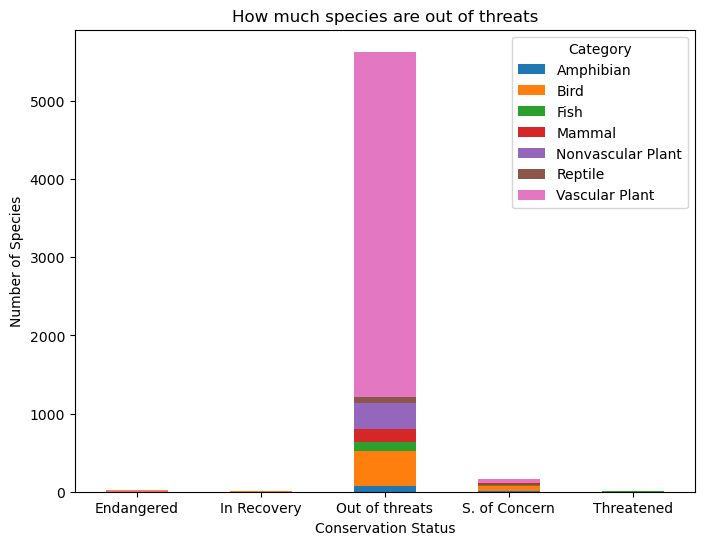

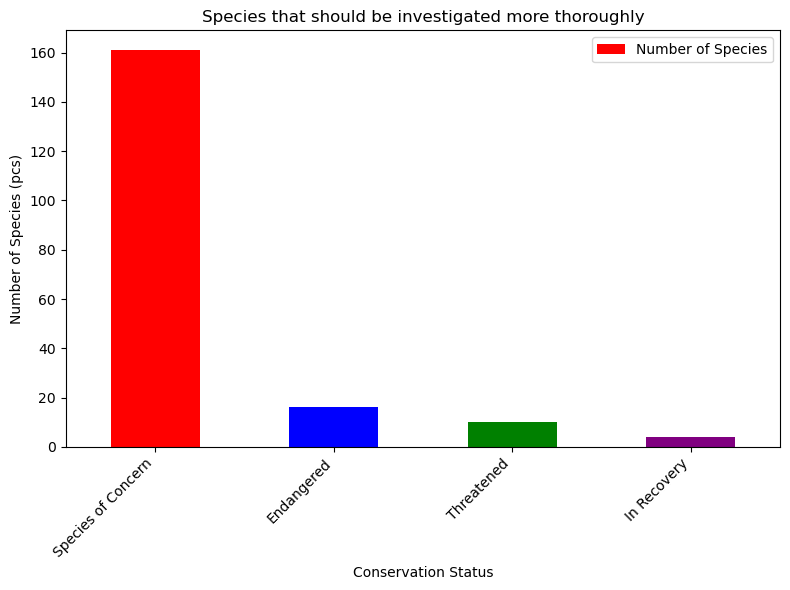

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# EDA
df_observ = pd.read_csv('observations.csv')
df_observ = df_observ.rename(columns={
    'park_name': 'Park Name',
    'observations': 'Observations',
    'scientific_name': 'Scientific name'
})
print(df_observ.head())
print(df_observ.shape)
print(df_observ.dtypes)
print(df_observ.isnull().sum())
nan_columns = df_observ.columns[df_observ.isnull().any()]
print('Columns with NaN: ' + ','.join(nan_columns))

print(' ')

df_spec = pd.read_csv('species_info.csv')

df_spec = df_spec.rename(columns={
    'category': 'Category',
    'scientific_name': 'Scientific name',
    'common_names': 'Common names',
    'conservation_status': 'Conservation status'})

print(df_spec.shape)
print(df_spec.dtypes)

nan_columns_1 = df_spec.columns[df_spec.isnull().any()]

nan_rows = df_spec[df_spec.isnull().any(axis=1)]

df_spec['Conservation status'] = df_spec['Conservation status'].fillna('NaN')
print(df_spec.head())
nan_count = (df_spec['Conservation status'] == 'NaN').sum()
print(nan_count)

# whether some columns are match in both tables
common_columns = df_observ.columns.intersection(df_spec.columns)
for column in common_columns:
    if df_observ[column].equals(df_spec[column]):
        print(f"Column {column} matches in both tables.")
    else:
        print(f"Column {column} does not match in both tables.")


print(f"species shape: {df_observ.shape}")
print(f"observations shape: {df_spec.shape}")
print(f"number of species:{df_spec['Scientific name'].nunique()}")
print(f"number of categories:{df_spec['Category'].nunique()}")
print(f"categories:{df_spec['Category'].unique()}")
print(df_spec.groupby("Category").size())
print(f"conservation statuses: {df_spec['Conservation status'].nunique()}")
print(f"unique conservation statuses: {df_spec['Conservation status'].unique()}")
print(f"common names:{df_spec['Common names'].unique()}")
# print(f"na values:{df_spec['Conservation status'].isna().sum()}")
# print(df_spec.groupby("Conservation status").size())


print(f"all parks:{df_observ['Park Name'].nunique()}")
print(f"unique parks:{df_observ['Park Name'].unique()}")
print(f"all observations:{df_observ['Observations'].sum()}")

conservationCategory = df_spec.groupby(['Conservation status', 'Category'])['Scientific name']\
    .count()\
    .unstack()
print(conservationCategory)

# on this plot we can see, that the most species are not threatened
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
new_labels = ['Endangered', 'In Recovery', 'Out of threats', 'S. of Concern', 'Threatened']
ax.set_xticklabels(new_labels, rotation=0, ha='center')
plt.title('How much species are out of threats')
plt.savefig("how_much_species_are_out_threats.png")
plt.show()
plt.clf()
plt.close()

# on this plot we can see the proportion of affected species
df = pd.read_csv('species_info.csv')
df_cleaned = df.dropna(subset=['conservation_status'])

status_counts = df_cleaned['conservation_status'].value_counts().reset_index()
status_counts.columns = ['Conservation Status', 'Number of Species']

colors = ['red', 'blue', 'green', 'purple', 'orange']
ax = status_counts.plot(kind='bar', x='Conservation Status', y='Number of Species', figsize=(8, 6), color=colors, stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species (pcs)")
ax.set_xticklabels(status_counts['Conservation Status'], rotation=45, ha='right')
plt.title('Species that should be investigated more thoroughly')
plt.tight_layout()
plt.savefig("Species_to_investigate.png")
plt.show()
plt.clf()
plt.close()



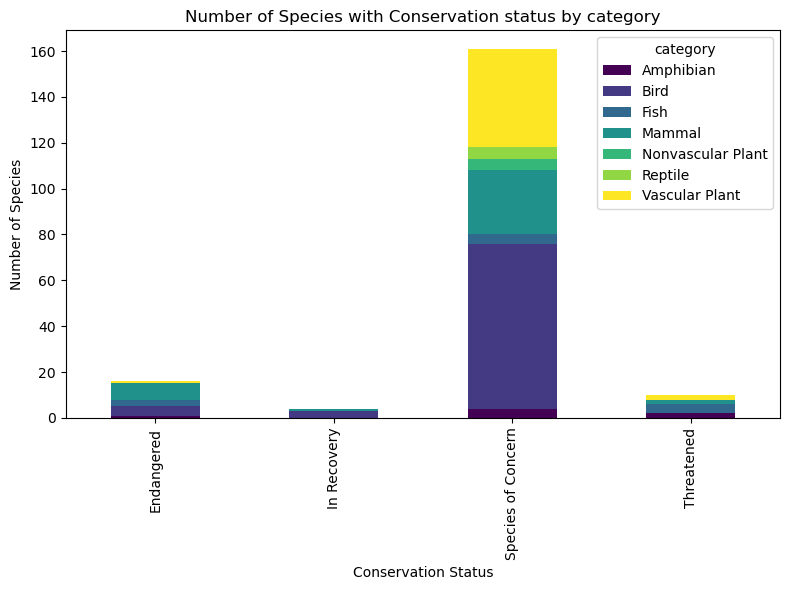

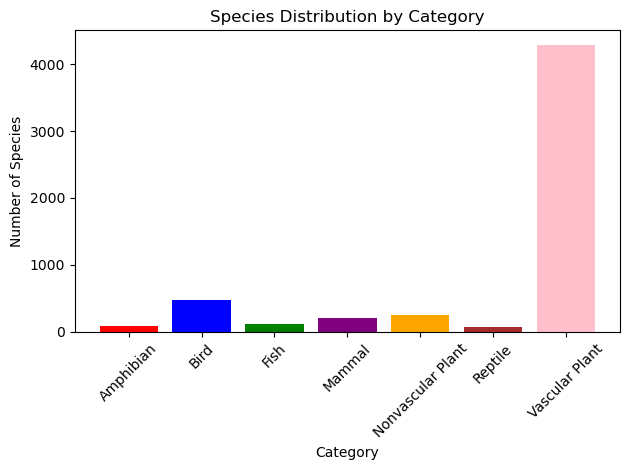

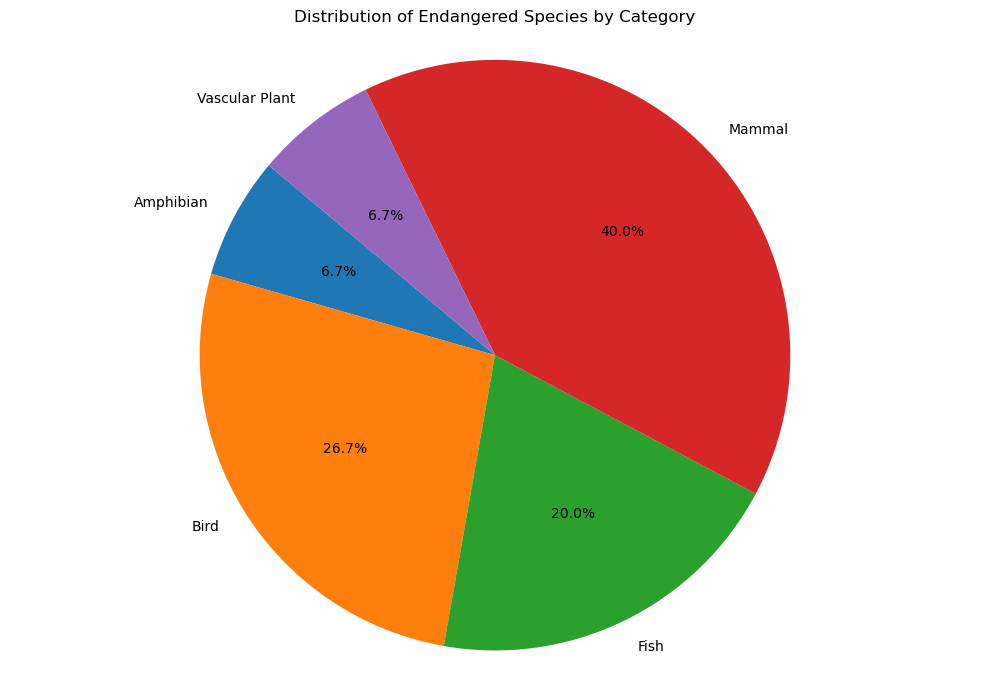

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('observations.csv')
df_1 = pd.read_csv('species_info.csv')

df_1.fillna('No Intervention', inplace=True)
df_1.groupby("conservation_status").size()
conservationCategory = df_1[df_1.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True, colormap='viridis')
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.title('Number of Species with Conservation status by category')
plt.tight_layout()
plt.savefig("Species_with_Conservation_status.png")
plt.show()
plt.clf()
plt.close()
def filter_and_group_species(df):
    filtered_df = df_1.dropna(subset=['conservation_status'])
    filtered_df = filtered_df.drop_duplicates(subset=['common_names'])
    filtered_df = filtered_df[filtered_df['conservation_status'] != 0]
    grouped_species = filtered_df.groupby('category')['common_names'].apply(list).to_dict()
    
    return grouped_species
grouped_species = filter_and_group_species(df)

category_counts = {category: len(species) for category, species in grouped_species.items()}

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']
plt.bar(category_counts.keys(), category_counts.values(), color=colors)
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.title('Species Distribution by Category')
plt.tight_layout()
plt.savefig("Species_Distribution_by Category.png")
plt.show()
plt.clf()
plt.close()

def filter_and_group_species(df):
    
    filtered_df = df.dropna(subset=['conservation_status'])
    filtered_df = filtered_df[filtered_df['conservation_status'] != 0]
    filtered_df = filtered_df.drop_duplicates(subset=['common_names'])
        
    endangered_df = filtered_df[filtered_df['conservation_status'] == 'Endangered']
    
    grouped_species = endangered_df.groupby('category')['common_names'].apply(list).to_dict()
    
    return grouped_species

df = pd.read_csv('species_info.csv')
grouped_species = filter_and_group_species(df)

category_counts = {category: len(species) for category, species in grouped_species.items()}

plt.figure(figsize=(10, 7))
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Endangered Species by Category')
plt.tight_layout()
plt.axis('equal')
plt.savefig("Endangered_Species_by_Category.png")
plt.show()
plt.clf()
plt.close()


In [89]:
import pandas as pd

species_info = pd.read_csv('species_info.csv')

species_info = species_info.dropna(subset=['conservation_status'])
species_info = species_info[species_info['conservation_status'] != 0]

endangered_species = species_info[species_info['conservation_status'] == 'Endangered']

num_endangered_species = endangered_species['scientific_name'].nunique()

print(f"Total number of endangered species: {num_endangered_species}")


Total number of endangered species: 15


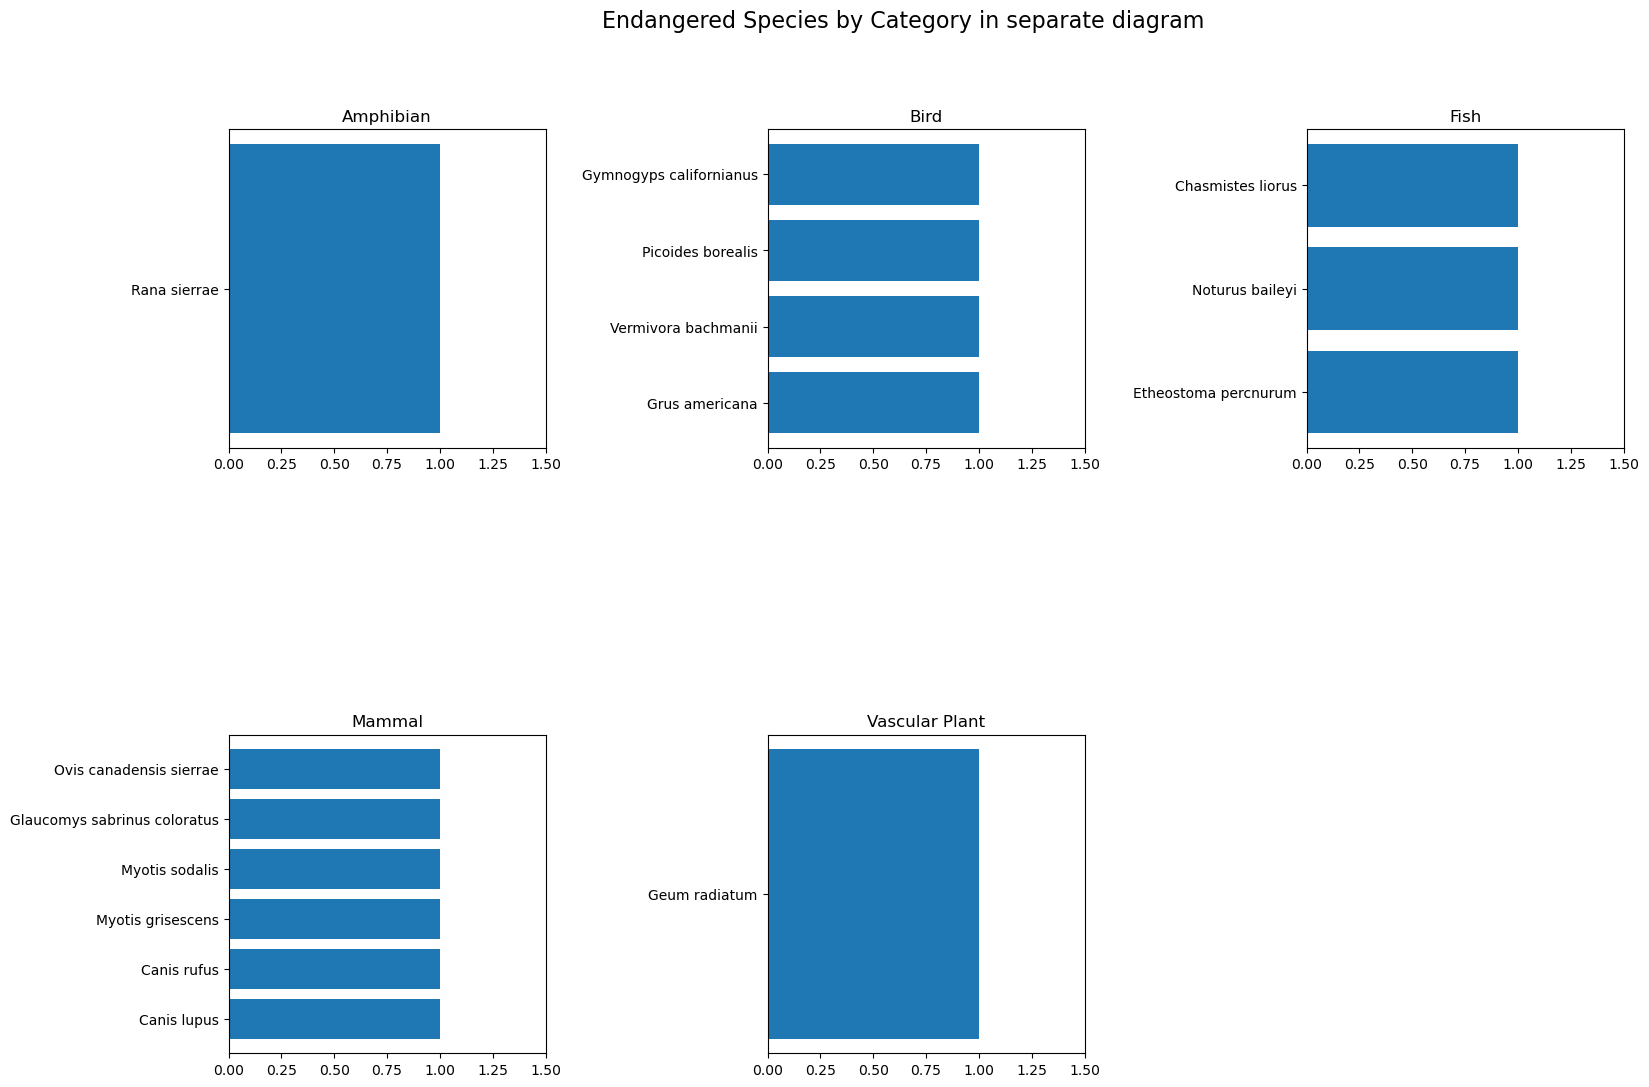

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Amphibian': ['Rana sierrae'],
    'Bird': ['Grus americana', 'Vermivora bachmanii', 'Picoides borealis', 'Gymnogyps californianus'],
    'Fish': ['Etheostoma percnurum', 'Noturus baileyi', 'Chasmistes liorus'],
    'Mammal': ['Canis lupus', 'Canis rufus', 'Myotis grisescens', 'Myotis sodalis', 'Glaucomys sabrinus coloratus', 'Ovis canadensis sierrae', 'Canis lupus'],
    'Vascular Plant': ['Geum radiatum']
}

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

categories = list(data.keys())
for i, category in enumerate(categories):
    row = i // 3
    col = i % 3
    species = data[category]
    axs[row, col].barh(species, [1] * len(species))
    axs[row, col].set_title(category)
    axs[row, col].set_xlim(0, 1.5)

fig.delaxes(axs[1, 2])

plt.subplots_adjust(wspace=0.7, hspace=0.9)

fig.suptitle('Endangered Species by Category in separate diagram', fontsize=16)

plt.savefig("Endangered_Species_by_Category_separate_diagram.png")
plt.show()
plt.clf()
plt.close()


In [251]:
import pandas as pd

data = {
    'Amphibian': {'Yosemite National Park': ['Rana sierrae']},
    'Bird': {
        'Yellowstone National Park': ['Grus americana', 'Vermivora bachmanii'],
        'Yosemite National Park': ['Picoides borealis', 'Gymnogyps californianus']
    },
    'Fish': {
        'Yellowstone National Park': ['Etheostoma percnurum', 'Noturus baileyi'],
        'Yosemite National Park': ['Chasmistes liorus']
    },
    'Mammal': {
        'Yellowstone National Park': ['Canis lupus', 'Canis rufus'],
        'Yosemite National Park': ['Myotis grisescens', 'Myotis sodalis', 'Glaucomys sabrinus coloratus', 'Ovis canadensis sierrae', 'Canis lupus']
    },
    'Vascular Plant': {'Yosemite National Park': ['Geum radiatum']}
}

rows = []
for category, parks in data.items():
    for park, species in parks.items():
        for specie in species:
            rows.append([park, category, specie])

df = pd.DataFrame(rows, columns=['Park', 'Category', 'Species'])

df_sorted = df.sort_values(by='Park').reset_index(drop=True)

print(df_sorted)

df_sorted.to_csv('endangered_species_by_category_and_park.csv', index=False)


                         Park        Category                       Species
0   Yellowstone National Park            Bird                Grus americana
1   Yellowstone National Park            Bird           Vermivora bachmanii
2   Yellowstone National Park            Fish          Etheostoma percnurum
3   Yellowstone National Park            Fish               Noturus baileyi
4   Yellowstone National Park          Mammal                   Canis lupus
5   Yellowstone National Park          Mammal                   Canis rufus
6      Yosemite National Park       Amphibian                  Rana sierrae
7      Yosemite National Park            Bird             Picoides borealis
8      Yosemite National Park            Bird       Gymnogyps californianus
9      Yosemite National Park            Fish             Chasmistes liorus
10     Yosemite National Park          Mammal             Myotis grisescens
11     Yosemite National Park          Mammal                Myotis sodalis
12     Yosem

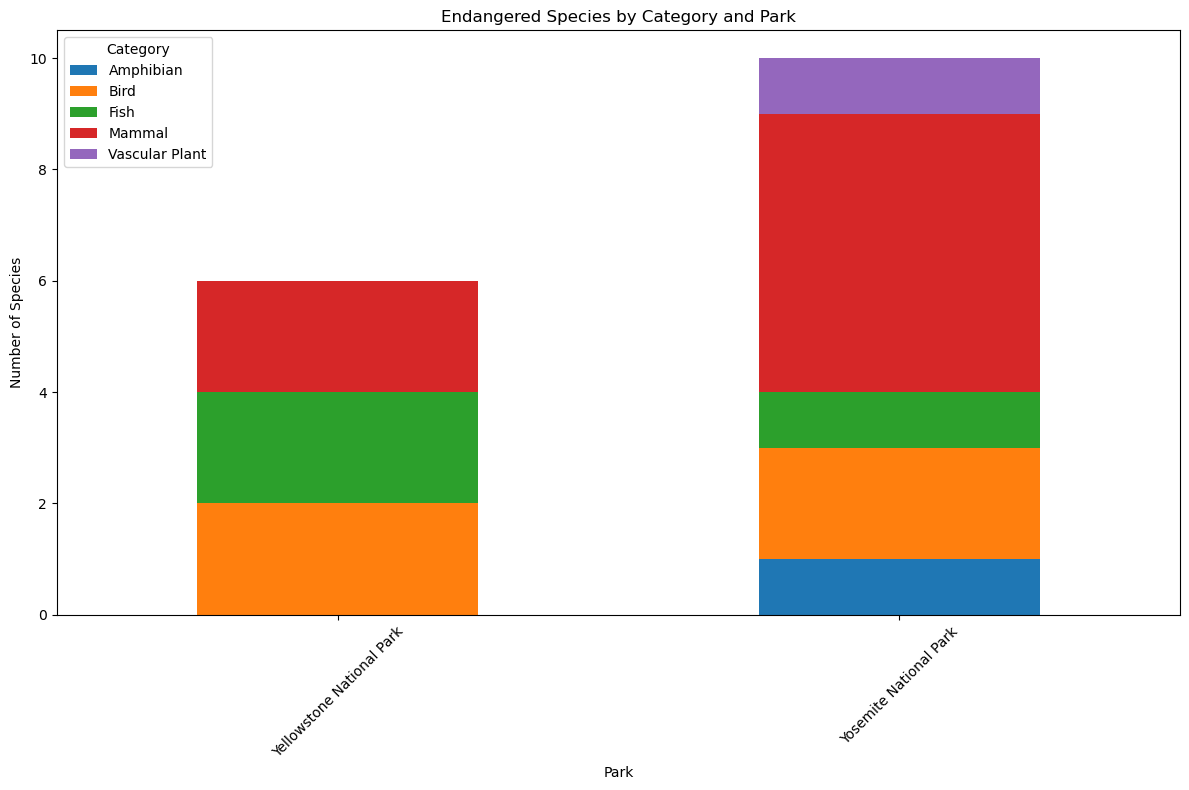

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Park': ['Yellowstone National Park', 'Yellowstone National Park', 'Yellowstone National Park', 'Yellowstone National Park', 'Yellowstone National Park', 'Yellowstone National Park', 'Yosemite National Park', 'Yosemite National Park', 'Yosemite National Park', 'Yosemite National Park', 'Yosemite National Park', 'Yosemite National Park', 'Yosemite National Park', 'Yosemite National Park', 'Yosemite National Park', 'Yosemite National Park'],
    'Category': ['Bird', 'Bird', 'Fish', 'Fish', 'Mammal', 'Mammal', 'Amphibian', 'Bird', 'Bird', 'Fish', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Vascular Plant'],
    'Species': ['Grus americana', 'Vermivora bachmanii', 'Etheostoma percnurum', 'Noturus baileyi', 'Canis lupus', 'Canis rufus', 'Rana sierrae', 'Picoides borealis', 'Gymnogyps californianus', 'Chasmistes liorus', 'Myotis grisescens', 'Myotis sodalis', 'Glaucomys sabrinus coloratus', 'Ovis canadensis sierrae', 'Canis lupus', 'Geum radiatum']
}

df = pd.DataFrame(data)

category_counts = df.groupby(['Park', 'Category']).size().unstack(fill_value=0)

category_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Park')
plt.ylabel('Number of Species')
plt.title('Endangered Species by Category and Park')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Endangered_Species_by_Category_and_Park.png")
plt.show()


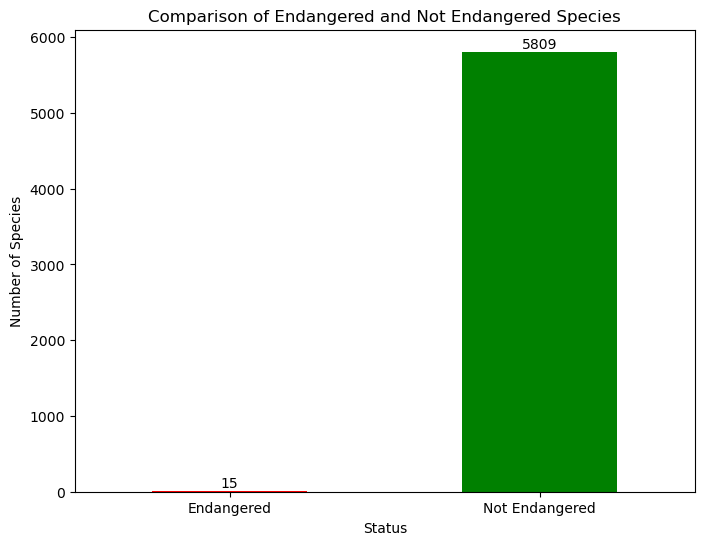

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Status': ['Endangered', 'Not Endangered'],
    'Count': [15, 5809]  # Прикладові дані
}

df = pd.DataFrame(data)

colors = ['red', 'green']
ax = df.plot(kind='bar', x='Status', y='Count', figsize=(8, 6), color=colors, legend=False)
ax.set_xlabel("Status")
ax.set_ylabel("Number of Species")
ax.set_title('Comparison of Endangered and Not Endangered Species')
ax.set_xticklabels(df['Status'], rotation=0)

for i in ax.containers:
    ax.bar_label(i, label_type="edge")

plt.savefig("comparison_endangered_not_endangered_species.png")
plt.show()
plt.clf()
plt.close()


In [22]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
                [75, 413]]

chi2, p, dof, expected = chi2_contingency(contingency1)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# In this case, a high p value (0.6876) indicates 
# that there is no statistically significant 
# difference between the observed and expected frequencies

Chi2 Statistic: 0.1617014831654557
P-value: 0.6875948096661336
Degrees of Freedom: 1
Expected Frequencies:
[[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]]
